In [227]:
# Construct zonal and meridional winds (u and v) from Nansen's FRAM expedition
# based on the NSIDC dataset
# TR, October 2020

In [228]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import radians
import cmath 

In [229]:
ls 

FRAM.mat                     technical_documentation.pdf
FRAMwind_u_v.ipynb           uni.fram.dat
complex_maths.ipynb


In [230]:
#less uni.fram.dat

In [231]:
# load Christian's MATLAB file
FRAMmat = scipy.io.loadmat('FRAM.mat')
FRAMstruct=FRAMmat['FRAM'] # FRAM station
val = FRAMstruct[0,0]

In [232]:
val.dtype

dtype([('WMO', 'O'), ('Year', 'O'), ('Month', 'O'), ('Day', 'O'), ('Time', 'O'), ('Posflag', 'O'), ('Latitude', 'O'), ('Longitude', 'O'), ('Tair', 'O'), ('Pressure', 'O'), ('WindDir', 'O'), ('WindSpeed', 'O'), ('CloudTenths', 'O'), ('LowCloudTenths', 'O'), ('RelHumidity', 'O'), ('DewPoint', 'O'), ('WetBulbTemp', 'O'), ('VaporPressure', 'O'), ('Precipitation', 'O'), ('SurfaceTemp', 'O'), ('SeaSurfaceTemp', 'O'), ('StationName', 'O'), ('DATUM', 'O'), ('Distance', 'O'), ('DriftDirection', 'O'), ('DriftSpeedMS', 'O')])

In [233]:
val['Year']

array([[1893],
       [1893],
       [1893],
       ...,
       [1896],
       [1896],
       [1896]], dtype=uint16)

#### read the wind direction in degress

In [234]:
alphas = np.array(val['WindDir']).flatten() # degrees
speeds = np.array(val['WindSpeed']).flatten()

In [235]:
np.min(alphas), np.max(alphas)

(0.0, 999.9)

#### 999.9 is missing data

In [238]:
alphas=np.ma.masked_array(alphas, mask=alphas>990.)

#### Plot compass 32-wind compass rose, speed

In [254]:
# convert to radians
alphas_rad = [radians(deg) for deg in alphas.filled(np.nan)]
speeds = np.ma.masked_array(speeds, mask=alphas>990.).filled(np.nan)

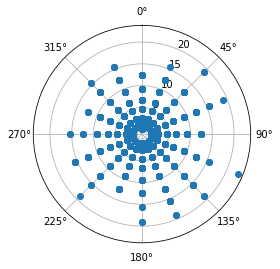

In [255]:
# plot 32-wind compass rose

# From documentation:
# Wind direction was reported on a 32-point compass scale (that is, points have 11.25
# degrees of separation). Wind direction was noted to the nearest compass point in degrees
# True. Wind speed was measured with a Mohn hand-held anemometer and recorded in
# meters per second. (The wind data for Fram received at NSIDC were in knots. We
# converted these values to m/s).

# Usually clockwise: https://en.wikipedia.org/wiki/Points_of_the_compass#32-wind_compass_rose

compass = plt.subplot(1, 1, 1, projection='polar')
compass.set_theta_zero_location('N')
compass.set_theta_direction(-1) # clock-wise
compass.plot(alphas_rad, speeds,'o')
plt.show()

Apparently this is only a 16-wind rose..?

In [279]:
np.unique(alphas) # Yep.

masked_array(data=[0.0, 22.5, 45.0, 67.5, 90.0, 112.5, 135.0, 157.5,
                   180.0, 202.5, 225.0, 247.5, 270.0, 292.5, 315.0, 337.5,
                   360.0, --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False,  True],
       fill_value=1e+20)

#### now convert to u and v winds

In [280]:
zs = [cmath.rect(speed, alpha_rad) for speed,alpha_rad in zip(speeds,alphas_rad)] # polar to complex numbers

In [281]:
U = np.zeros_like(speeds)
V = np.zeros_like(speeds)
U = np.ma.masked_array(U, mask=alphas>990.)
V = np.ma.masked_array(V, mask=alphas>990.)

In [282]:
for i, z in enumerate(zs, start=0):
    U[i] = z.real
    V[i] = z.imag

In [283]:
U, V

(masked_array(data=[-0.9949769241492328, -1.838477631085024,
                    -1.838477631085024, ..., 4.249845849551918,
                    1.8384776310850237, 4.737615433949869],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20),
 masked_array(data=[-2.402086784529346, -1.8384776310850235,
                    -1.8384776310850235, ..., 1.760343788879413,
                    1.8384776310850235, 4.737615433949868],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20))

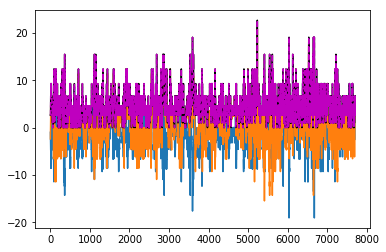

In [284]:
plt.plot(U)
plt.plot(V)
plt.plot(np.sqrt(U**2 + V**2), 'k')
plt.plot(speeds, 'm--')
plt.show()

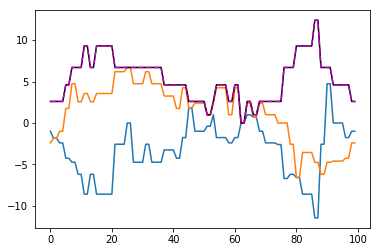

In [336]:
cut=100
plt.plot(U[:cut])
plt.plot(V[:cut])
plt.plot(np.sqrt(U[:cut]**2 + V[:cut]**2), 'k')
plt.plot(speeds[:cut], 'm--')
plt.show()

In [285]:
diff = speeds - np.sqrt(U**2 + V**2)

In [286]:
np.min(diff), np.max(diff)

(-1.7763568394002505e-15, 1.7763568394002505e-15)

In [287]:
np.nanmin(V), np.nanmax(V), np.nanmin(U), np.nanmax(V)

(-15.5, 20.972065388006207, -19.1, 20.972065388006207)

In [288]:
#### histograms

In [289]:
Vvalid=V[~np.isnan(V)]
Uvalid=U[~np.isnan(U)]

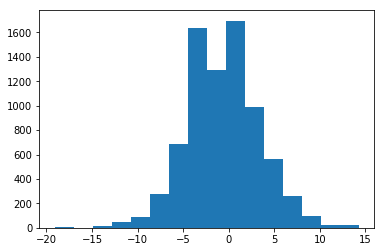

In [292]:
plt.hist(Uvalid, 16)
plt.show()

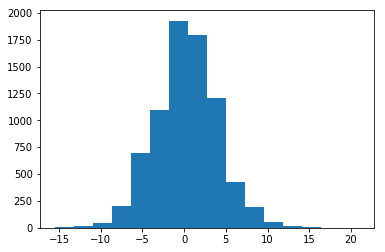

In [293]:
plt.hist(Vvalid, 16)
plt.show()

#### transform back to see that everything worked

In [331]:
# convert U,V to array of complex winds
C = np.vectorize(complex)(U, V) 

In [332]:
polar = [cmath.polar(c) for c in C] # polar to complex numbers

In [333]:
test=1000
polar[test][0], polar[test][1]

(2.6, -0.3926990816987239)

In [334]:
speeds[test], 2*pi-alphas_rad[test]

(2.6, 0.3926990816987237)

#### construct the date string ... to do

In [339]:
('Year', 'O'), ('Month', 'O'), ('Day', 'O'), ('Time', 'O')

(('Year', 'O'), ('Month', 'O'), ('Day', 'O'), ('Time', 'O'))